In [183]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
L = np.pi     # length
T = 1.0     # total 
   # number of time steps
kappa = 1 # diffusion coefficient 
dx = 0.1   # grid spacing
dt = 0.01   # time step
N=int(L/dx)+1
M=int(T/dt)
x = np.arange(0, L,dx)
t = np.arange(0,T, dt)
t.shape
gamma=(dt/dx**2)
gamma



0.9999999999999998

In [187]:
BC=[0,0]
initial=np.sin(x)
U=np.zeros((M,N))
U[0,:]=initial
U[:,0]=BC[0]
U[:,-1]=BC[1]
A=np.zeros((N,N))
A=np.diag([2+2*gamma]*(N),0)+np.diag([-gamma]*(N-1),-1)+np.diag([-gamma]*(N-1),1)
B=np.diag([2-2*gamma]*(N),0)+np.diag([gamma]*(N-1),-1)+np.diag([gamma]*(N-1),1)
A.shape
A[0,0]=1
A[0,1:-1]=A[1:-1,0]=0
A[N-1,N-1]=1
A[-1,1:-1]=A[N-2,N-1]=0
B[0,0]=1
B[0,1:-1]=B[1:-1,0]=0
B[N-1,N-1]=1
B[-1,1:-1]=B[N-2,N-1]=0


B


array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 4.4408921e-16, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 4.4408921e-16, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.4408921e-16,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        4.4408921e-16, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]])

[0.    0.199 0.395 0.588 0.775 0.954 1.124 1.282 1.428 1.559 1.675 1.774
 1.855 1.917 1.961 1.985 1.989 1.973 1.938 1.883 1.81  1.718 1.609 1.484
 1.344 1.191 1.026 0.85  0.667 0.476 0.239 0.   ]


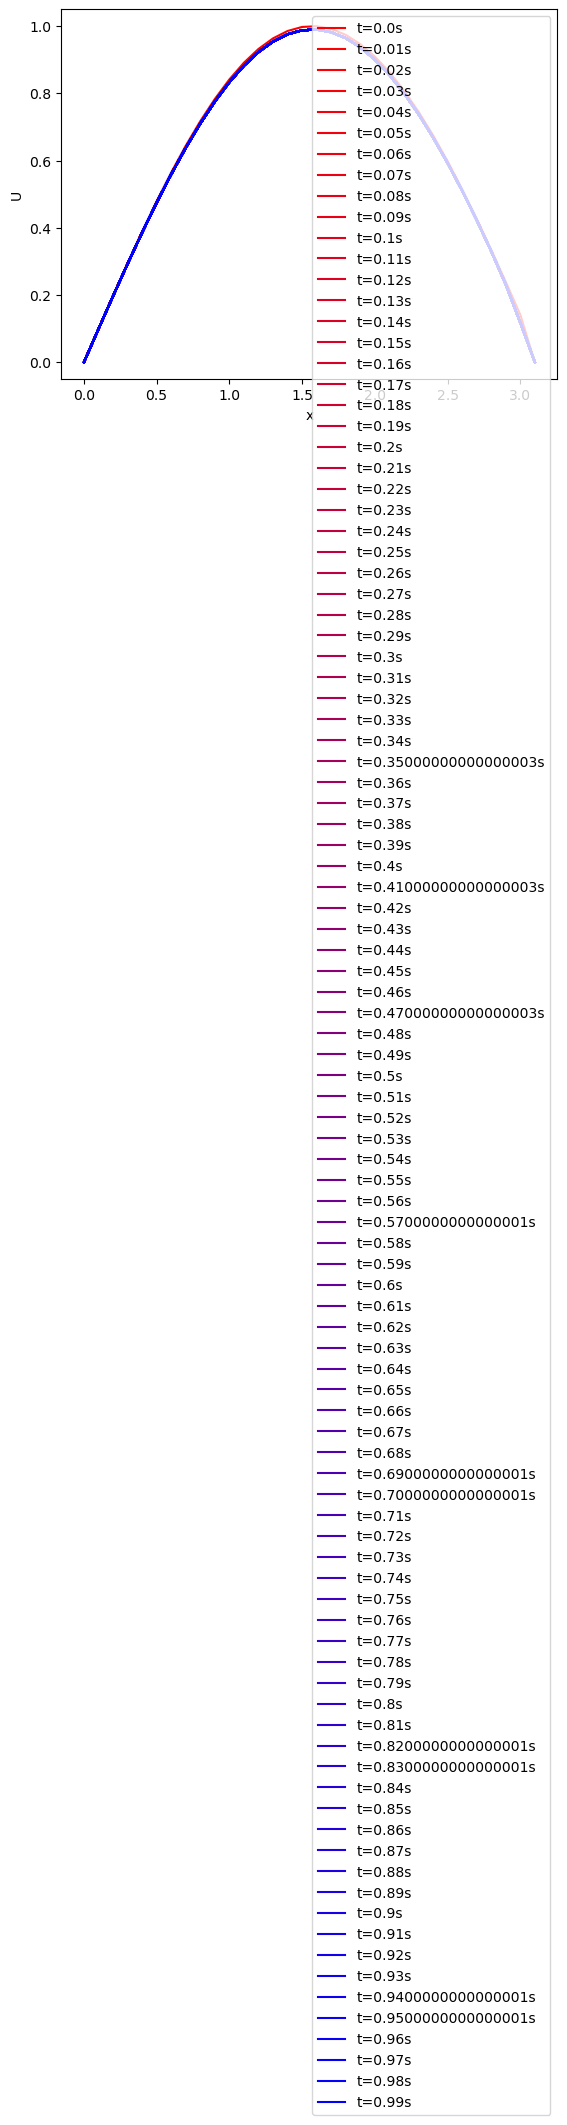

In [188]:


# Create the grid
for j in range(0,M-1):
    b=U[0,:].copy()
    b=np.dot(B,b)
    sol=np.linalg.solve(A,b)
    U[j+1,:]=sol
print(b.round(3))

#for plotting
R=np.linspace(1,0,M)
B=np.linspace(0,1,M)
G=0
for j in range(M):
    plt.plot(x,U[j,:],color=[R[j],G,B[j]])
plt.xlabel('x')
plt.ylabel('U')
plt.legend([f't={i}s' for i in t])
